In [2]:
import time

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn import neighbors, svm, tree, linear_model, ensemble, neural_network
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

In [3]:
%matplotlib inline
plt.style.use('bmh')

In [4]:
pd.set_option("max_columns",90, "max_rows", 90)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Exploratory Analysis

### Basics

In [5]:
df = pd.read_csv('Gse_panel_current_sample_raw.csv')

In [6]:
df.head()

,loan_id,orig_chn,orig_rt,orig_upb,oltv,num_bo,dti,loan_purp,prop_type,num_unit,occ_stat,prop_state,msa,fico,oyr,oqtr,ind_ede,pmms_o,avg_upb,OUPB_Rel,fhb_flag,loan_age_qtr,year,qtr,status,status_prev,PMMS,HPI_O,HPI,ur,CUPB_calc,Orig_value,CLTV
0,F100Q1057907,T,8.00,65000,41,2.0,24,P,SF,1.0,O,WI,33340.0,752,2000,1,0.006619,8.26,124597.46950,0.521680,N,2,2000,3,Current,Current,8.03,156.42,161.16,4.000000,64866.87370,158536.58540,39.712615
1,F100Q1045595,T,8.25,81000,67,1.0,31,P,CO,1.0,O,IL,16974.0,787,2000,1,0.006619,8.26,144321.44180,0.561247,N,5,2001,2,Current,Current,7.13,140.68,156.12,4.400000,80348.95986,120895.52240,59.893918
2,8.32073E+11,C,8.25,148000,80,2.0,51,P,SF,1.0,P,WI,33340.0,733,2000,1,0.006619,8.26,124597.46950,1.187825,N,4,2001,1,Current,Current,7.01,156.42,166.05,4.230000,147117.00180,185000.00000,74.864766
3,F100Q1132127,R,8.75,94000,63,2.0,24,N,SF,1.0,O,MI,NaN,781,2000,1,0.006619,8.26,121230.93190,0.775380,N,2,2000,3,Current,Current,8.03,166.37,171.77,4.000000,93834.43235,149206.34920,60.911968
4,F100Q1027118,R,8.00,60000,61,2.0,28,P,SF,1.0,O,OH,45780.0,782,2000,1,0.006619,8.26,99538.46154,0.602782,N,10,2002,3,Current,Current,6.29,144.24,157.62,6.555973,58801.29455,98360.65574,54.066644


In [ ]:
df.info()  # missing values in the features - msa, num_bo, num_unit, status

### Numerical Distribution

In [8]:
# plt.figure(figsize=(9, 8))
# ax = sns.distplot(df['CLTV'], color='r', bins=50);  
# ax.set(xlabel='CLTV', ylabel='', title='Distribution of CLTV')

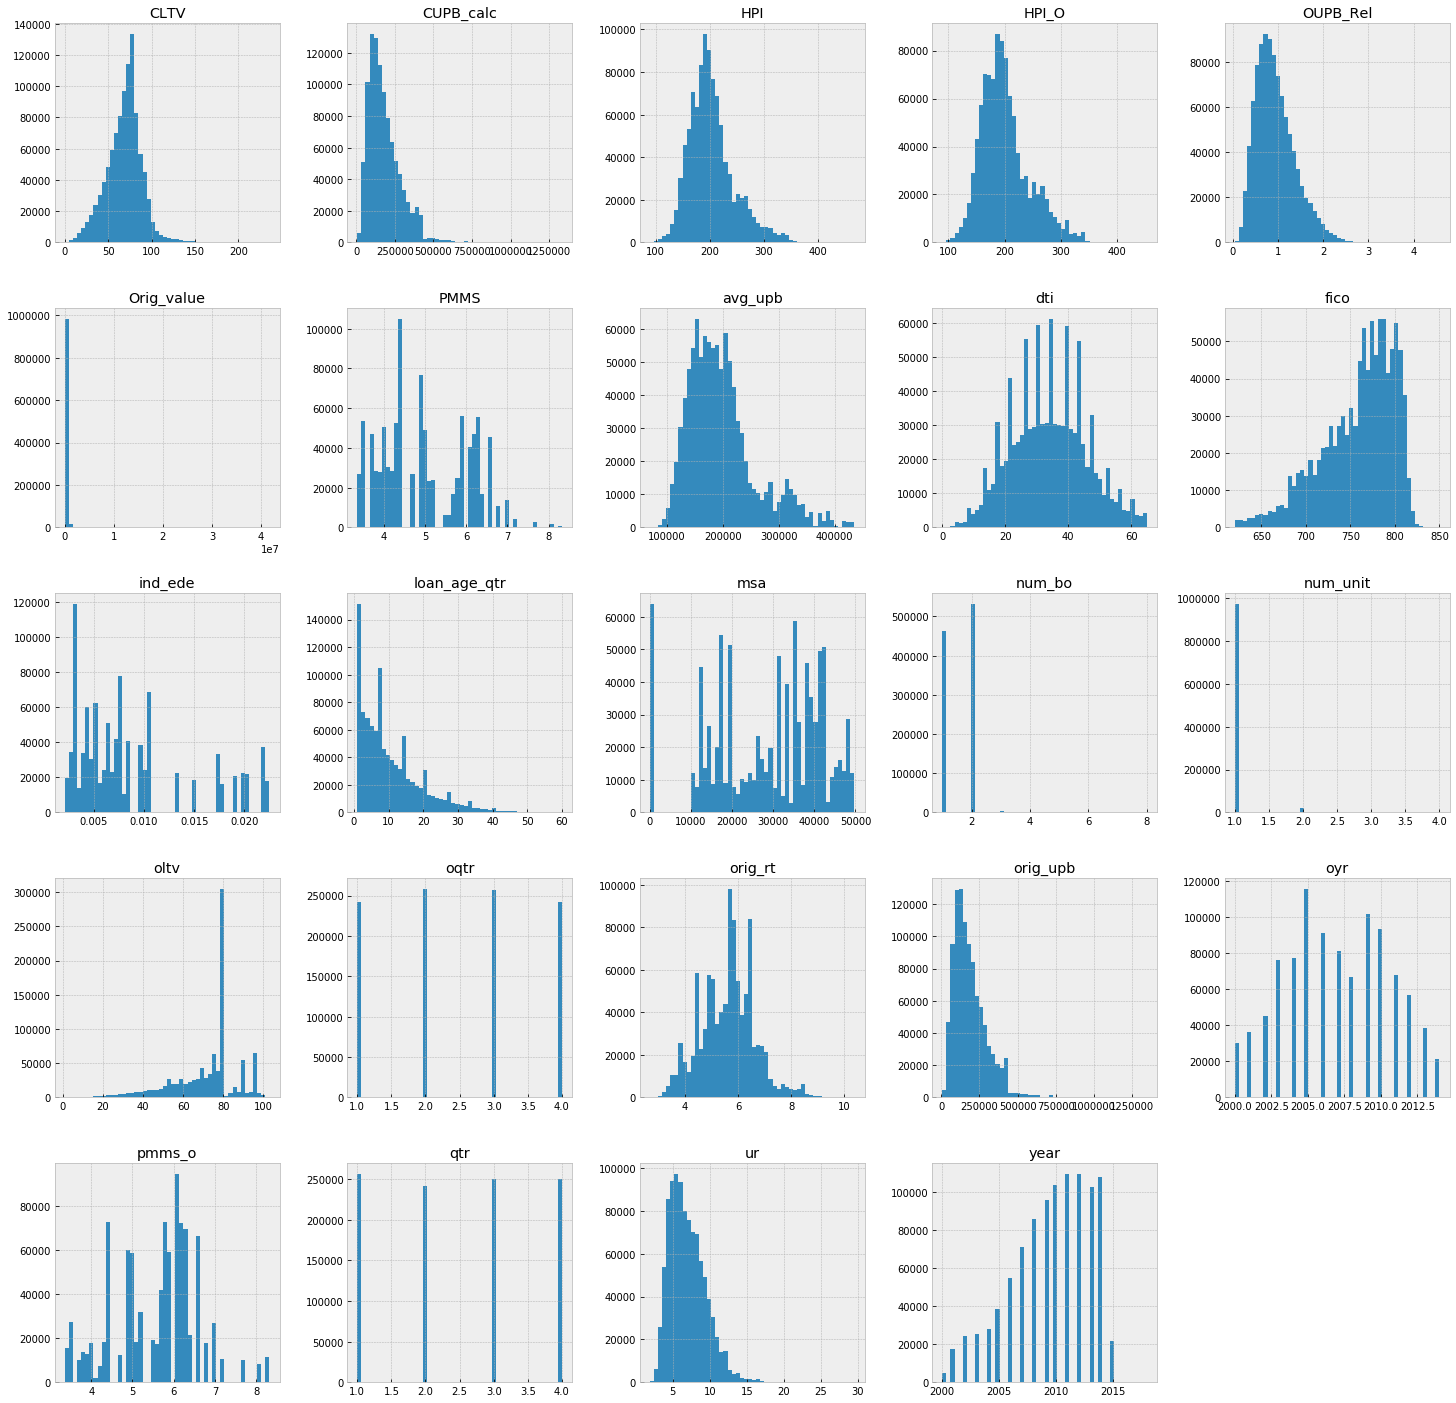

In [6]:
list(set(df.dtypes.tolist())) # get data types 
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()
df_num.hist(bins=50, figsize=(25, 25), xlabelsize=10, ylabelsize=10, layout=(5, 5));

In [ ]:
## outlier detection
from outlier_detection import *
df_num.apply(plot, axis=0)


In [88]:
print(df['status'].value_counts())
print(df['status'].value_counts(normalize=True))

Current      895428
Prepay        44419
D60-D90        2045
D120-D150       514
Claim            40
D180-D330         4
D360+             1
Name: status, dtype: int64
Current      0.950106
Prepay       0.047131
D60-D90      0.002170
D120-D150    0.000545
Claim        0.000042
D180-D330    0.000004
D360+        0.000001
Name: status, dtype: float64


### Categorical Distribution

In [9]:
df_cat = df.select_dtypes(include=['O'])
df_cat.columns

Index(['loan_id', 'orig_chn', 'loan_purp', 'prop_type', 'occ_stat',
       'prop_state', 'fhb_flag', 'status', 'status_prev'],
      dtype='object')

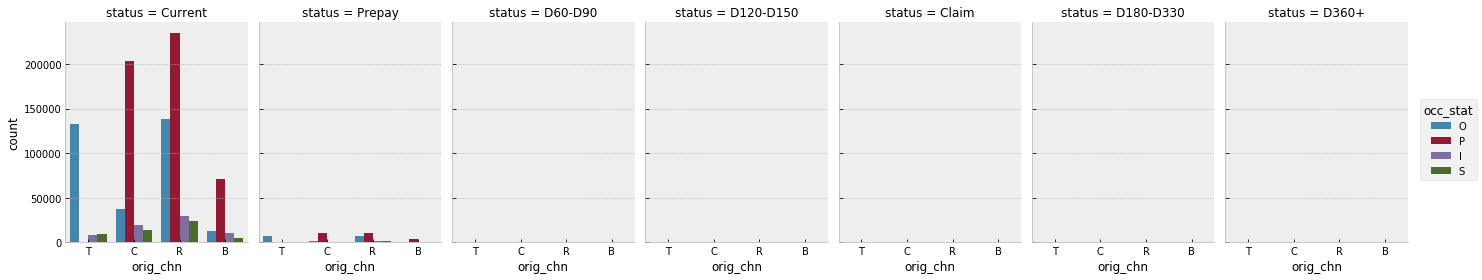

In [24]:
g = sns.factorplot(x="orig_chn", hue="occ_stat", col="status", data=df, kind="count", size=4, aspect=.7);

In [ ]:
sns.countplot(x='orig_chn', data=df)   # , hue='loan_purp'

sns.countplot(x='loan_purp', data=df)

sns.countplot(x='prop_type', data=df)

sns.countplot(x='occ_stat', data=df)

sns.countplot(y='prop_state', data=df) 

sns.countplot(x='fhb_flag', data=df)

### Correlation among features

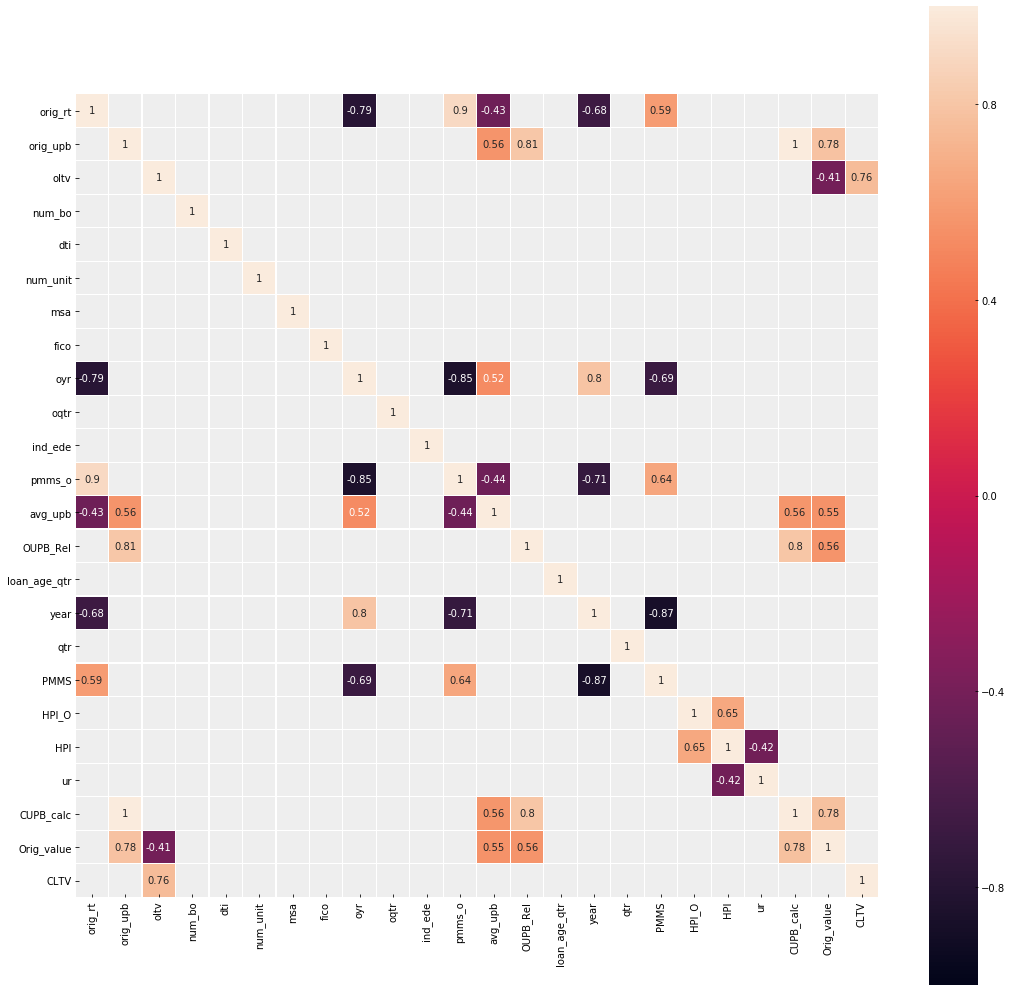

In [27]:
corr = df_num.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], vmax=1.0, vmin=-1.0, linewidths=0.1, fmt='.2g', annot=True, annot_kws={"size": 10}, square=True);

### Categorical Features

In [104]:
df_cat = df.select_dtypes(include=['O'])

In [106]:
df_cat.head()

,loan_id,orig_chn,loan_purp,prop_type,occ_stat,prop_state,fhb_flag,status,status_prev
0,F100Q1057907,T,P,SF,O,WI,N,Current,Current
1,F100Q1045595,T,P,CO,O,IL,N,Current,Current
2,8.32073E+11,C,P,SF,P,WI,N,Current,Current
4,F100Q1027118,R,P,SF,O,OH,N,Current,Current
6,F100Q1097827,T,P,CO,O,OH,N,Current,Current


In [ ]:
# convert the categorical data to labels
lbl_enc = LabelEncoder()
lbl_enc.fit(df_cat['status'])
arr = lbl_enc.transform(df_cat['status'])
status = pd.Series(arr)
status

# convert the labels to binary varibales
ohe = OneHotEncoder()
ohe.fit(df_cat['status'])
arr = ohe.transform(df_cat['status'])


In [153]:
# OR 
# convert the categorical data to binary variables
temp = pd.get_dummies(df_cat[['orig_chn', 'loan_purp', 'prop_type', 'occ_stat', 'fhb_flag']])
temp.head()

,orig_chn_B,orig_chn_C,orig_chn_R,orig_chn_T,loan_purp_C,loan_purp_N,loan_purp_P,loan_purp_R,loan_purp_U,prop_type_CO,prop_type_CP,prop_type_LH,prop_type_MH,prop_type_PU,prop_type_SF,occ_stat_I,occ_stat_O,occ_stat_P,occ_stat_S,fhb_flag_N,fhb_flag_Y
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
6,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [152]:
df_cat['prop_state'].value_counts()

(54,)

### Blind Test

In [ ]:
df.head()

In [128]:
df['status'] = df['status'].apply(lambda x: int(x=='D60-D90')) 
X = df.drop(['loan_id', 'status', 'status_prev', 'prop_state'], axis=1).copy()  # drop status_prev, prop_state for now
y = df['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [159]:
X_train = pd.get_dummies(X_train)

In [ ]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

In [167]:
X_test = pd.get_dummies(X_test)

In [174]:
def print_accuracy(f):
    print(f"Accuracy = {100 - 100*np.sum(f(X_test) == Y_test)/len(Y_test)}%")
    time.sleep(0.5) # to let the print get out before any progress bars

In [ ]:
print_accuracy(knn.predict)
print(np.unique(knn.predict(X_test)))

prob_y = knn.predict_proba(X)
prob_y = [p[1] for p in prob_y]
print(roc_auc_score(y, prob_y))

In [180]:
rforest = ensemble.RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=2, random_state=0)
rforest.fit(X_train, Y_train)

Accuracy = 0.212742252945759%
[0]


In [182]:
print_accuracy(rforest.predict)
print(np.unique(rforest.predict(X_test)))

prob_y = rforest.predict_proba(X)
prob_y = [p[1] for p in prob_y]
print(roc_auc_score(y, prob_y))

0.915541589130101


## Data Preprocessing

### Data Cleaning

### Data Transformation

In [ ]:
# orig_df.dropna(how='any').copy()       # where if any na exists
# df.info()  # 942451 left